In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

from models.wimp import SIWIMP
from models.wimp import SIWIMP_Helm
from models.inelastic import SIInel
from detectors.nai import DAMA
from veldists import VelDist
from constants import *

In [2]:
## Step 1
Det = DAMA()
Model = SIInel()
Dist = VelDist("modSHM",0.3) # standard halo model
Dist2 = VelDist("modShards",0.3) # standard halo model + shards

/Users/madeleinezurowski/Documents/sensitivity_dev/sgm/detector.py:107: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = integrate.quad(lambda E2: self.dRdE_True(E2,Model,NR,**kwargs)*self.Res(E,E2),0,2*self.Emax(),points=self.ROI(),limit=int(1E8))[0] ## this integral could probs be optimised


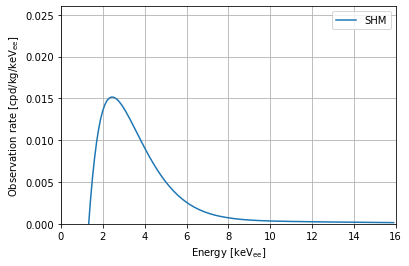

In [3]:
## Step 2 
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(e,Model.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist,delta=0*keV) for e in E]) ## note here you can pass the model variables as kwargs
# plt.plot(E,[Det.dRdE(DMRate2,e) for e in E])
plt.legend(["SHM","SHM+Shards"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.xlim(0,16)
plt.ylim(0,0.026)
plt.grid()
plt.show()